# Module 5: CNN Assignment

In [1]:
# Tasks to be Done:

# Using MNIST Dataset try to buildyourConvolutional Neural Network: 

# A. Do some necessary importslike: 
# a. Download the MNIST dataset through Keras 
# b. Import a sequential model 
# c. Import the convolution and pooling layers 
# d. Import dense layers, dropout layer, and the flatten layer 
# e. Import numpy 

# B. Fit the dataset to a model, i.e. train the model for 12 epochs. 
# a. After training the model,evaluate the loss and accuracy of the model on the test 
# data and print it.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
#Loading mnist Dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[30].shape

(28, 28)

In [6]:
#scaling the train and test data

In [7]:
x_train = x_train/255.0

In [8]:
x_test = x_test/255.0

In [9]:
x_train[30].shape

(28, 28)

In [10]:
# Reshape the input data to be 4D (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [11]:
#lets now check a sample image

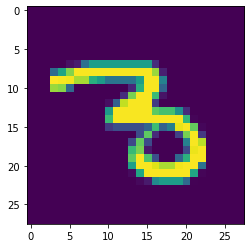

In [12]:
plt.imshow(x_train[30])

In [13]:
#changing the dependent data to categorical

In [14]:
y_train = tf.keras.utils.to_categorical(y_train)

In [15]:
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
#creating the first model

In [17]:
#del model
model = tf.keras.models.Sequential()

#input layer
model.add(tf.keras.Input((28,28,1),name = "Input_Layer"))

#chunk1
#conv +activation
model.add(tf.keras.layers.Conv2D(filters = 16,kernel_size = (3,3),strides = (1,1),
                                 padding = "valid",activation = "relu",name = "conv1"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "Pool1"))

#chunk2
#conv +activation
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),
                                 padding = "valid",activation = "relu",name = "conv2"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "Pool2"))

#chunk2
#conv +activation
model.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),
                                 padding = "valid",activation = "relu",name = "conv3"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "Pool3"))

#cat_layers
model.add(tf.keras.layers.Flatten(name = "flatten_layer"))
model.add(tf.keras.layers.Dense(100,activation = "relu",name = "Dense1"))
model.add(tf.keras.layers.Dense(100,activation = "relu",name = "Dense2"))
model.add(tf.keras.layers.Dense(10,activation = "softmax",name = "output_layer" ))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 16)        160       
                                                                 
 Pool1 (MaxPooling2D)        (None, 13, 13, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 5, 5, 32)          0         
                                                                 
 conv3 (Conv2D)              (None, 3, 3, 64)          18496     
                                                                 
 Pool3 (MaxPooling2D)        (None, 1, 1, 64)          0         
                                                                 
 flatten_layer (Flatten)     (None, 64)                0

In [19]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),loss = tf.keras.losses.categorical_crossentropy,
             metrics = ["acc"])

model_history = model.fit(x = x_train,y = y_train,batch_size = 32,epochs = 12,validation_data=(x_test, y_test))

Epoch 1/12
1875/1875 [==============================] - 50s 26ms/step - loss: 1.0662 - acc: 0.6620 - val_loss: 0.3051 - val_acc: 0.9006
Epoch 2/12
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2160 - acc: 0.9328 - val_loss: 0.1611 - val_acc: 0.9498
Epoch 3/12
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1479 - acc: 0.9539 - val_loss: 0.1335 - val_acc: 0.9590
Epoch 4/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1198 - acc: 0.9622 - val_loss: 0.1175 - val_acc: 0.9639
Epoch 5/12
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1014 - acc: 0.9683 - val_loss: 0.0956 - val_acc: 0.9706
Epoch 6/12
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0904 - acc: 0.9718 - val_loss: 0.0832 - val_acc: 0.9730
Epoch 7/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0806 - acc: 0.9749 - val_loss: 0.1250 - val_acc: 0.9626
Epoch 8/12
1875/1875 [==========================

In [20]:
#creating the second model

In [21]:
#del model2
model2 = tf.keras.models.Sequential()

#input layer
model2.add(tf.keras.Input((28,28,1),name = "Input_Layer"))

#chunk1
#conv +activation
model2.add(tf.keras.layers.Conv2D(filters = 16,kernel_size = (3,3),strides = (1,1),
                                 padding = "valid",activation = "relu",name = "conv1"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "Pool1"))

#chunk2
#conv +activation
model2.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),
                                 padding = "valid",activation = "relu",name = "conv2"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "Pool2"))

#chunk2
#conv +activation
model2.add(tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),
                                 padding = "valid",activation = "relu",name = "conv3"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "Pool3"))

#cat_layers
model2.add(tf.keras.layers.Flatten(name = "flatten_layer"))
model2.add(tf.keras.layers.Dense(100,activation = "relu",name = "Dense1"))
model2.add(tf.keras.layers.Dense(100,activation = "relu",name = "Dense2"))
model2.add(tf.keras.layers.Dense(10,activation = "softmax",name = "output_layer" ))

In [22]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 26, 26, 16)        160       
                                                                 
 Pool1 (MaxPooling2D)        (None, 13, 13, 16)        0         
                                                                 
 conv2 (Conv2D)              (None, 11, 11, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 5, 5, 32)          0         
                                                                 
 conv3 (Conv2D)              (None, 3, 3, 64)          18496     
                                                                 
 Pool3 (MaxPooling2D)        (None, 1, 1, 64)          0         
                                                                 
 flatten_layer (Flatten)     (None, 64)               

In [23]:
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),loss = tf.keras.losses.categorical_crossentropy,
             metrics = ["acc"])

model2_history = model.fit(x = x_train,y = y_train,batch_size = 32,epochs = 12,validation_data=(x_test, y_test))

Epoch 1/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0510 - acc: 0.9837 - val_loss: 0.0707 - val_acc: 0.9792
Epoch 2/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0480 - acc: 0.9844 - val_loss: 0.0623 - val_acc: 0.9826
Epoch 3/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0445 - acc: 0.9859 - val_loss: 0.0599 - val_acc: 0.9824
Epoch 4/12
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0419 - acc: 0.9868 - val_loss: 0.0707 - val_acc: 0.9798
Epoch 5/12
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0394 - acc: 0.9875 - val_loss: 0.0608 - val_acc: 0.9831
Epoch 6/12
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0376 - acc: 0.9884 - val_loss: 0.0682 - val_acc: 0.9804
Epoch 7/12
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0350 - acc: 0.9893 - val_loss: 0.0575 - val_acc: 0.9837
Epoch 8/12
1875/1875 [==========================

In [25]:
#so here we can see that our model2 with Adam optimizer have give a better test_accuracy score compared to our model1
#thus we will be going forward with this model2

In [31]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [41]:
model_history.history["loss"]

[1.0661637783050537,
 0.21599596738815308,
 0.14785759150981903,
 0.11977589875459671,
 0.10137258470058441,
 0.09040531516075134,
 0.0805841013789177,
 0.07453694939613342,
 0.06799924373626709,
 0.06281392276287079,
 0.05783030018210411,
 0.05437297746539116]

In [42]:
mod1 = pd.DataFrame()
mod1["Train_loss"] = model_history.history["loss"]
mod1["Test_loss"] = model_history.history["val_loss"]
mod1["Train_Accuracy"] = model_history.history["acc"]
mod1["Test_Accuracy"] = model_history.history["val_acc"]

In [43]:
mod1

,Train_loss,Test_loss,Train_Accuracy,Test_Accuracy
0,1.066164,0.305148,0.661983,0.9006
1,0.215996,0.161068,0.932767,0.9498
2,0.147858,0.133464,0.953917,0.9590
3,0.119776,0.117464,0.962183,0.9639
4,0.101373,0.095621,0.968350,0.9706
5,0.090405,0.083236,0.971750,0.9730
6,0.080584,0.124990,0.974883,0.9626
7,0.074537,0.089549,0.976767,0.9741
8,0.067999,0.092081,0.978533,0.9708
9,0.062814,0.098416,0.980350,0.9677


In [44]:
mod2 = pd.DataFrame()
mod2["Train_loss"] = model2_history.history["loss"]
mod2["Test_loss"] = model2_history.history["val_loss"]
mod2["Train_Accuracy"] = model2_history.history["acc"]
mod2["Test_Accuracy"] = model2_history.history["val_acc"]

In [45]:
mod2

,Train_loss,Test_loss,Train_Accuracy,Test_Accuracy
0,0.050991,0.070678,0.983733,0.9792
1,0.048004,0.062295,0.984400,0.9826
2,0.044469,0.059874,0.985867,0.9824
3,0.041903,0.070728,0.986833,0.9798
4,0.039417,0.060808,0.987483,0.9831
5,0.037591,0.068245,0.988417,0.9804
6,0.034979,0.057505,0.989300,0.9837
7,0.033440,0.060144,0.989550,0.9830
8,0.031207,0.066816,0.989917,0.9819
9,0.030288,0.061375,0.990533,0.9832


In [46]:
import seaborn as sns

# Model1 vs Model2

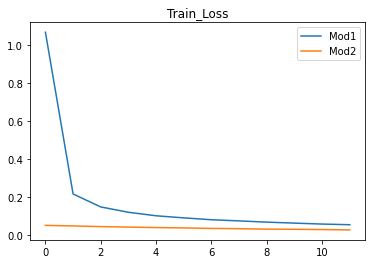

In [61]:
plt.plot("Train_loss",data = mod1,label = "Mod1")
plt.plot("Train_loss",data = mod2,label = "Mod2")
plt.title("Train_Loss")
plt.legend()
plt.show()

In [ ]:
#so from the above we can see that model 2 is perfroming better that model 1

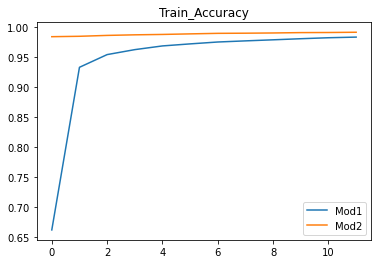

In [62]:
plt.plot("Train_Accuracy",data = mod1,label= "Mod1")
plt.plot("Train_Accuracy",data = mod2,label= "Mod2")
plt.title("Train_Accuracy")
plt.legend()
plt.show()

In [ ]:
# And here also model 2 Train accuracy score have outperformed model 1 

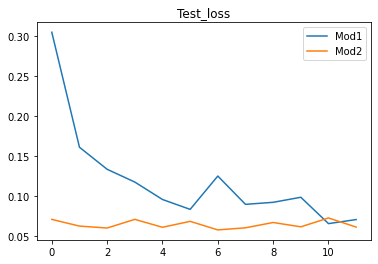

In [63]:
plt.plot("Test_loss",data = mod1,label= "Mod1")
plt.plot("Test_loss",data = mod2,label= "Mod2")
plt.title("Test_loss")
plt.legend()
plt.show()

In [ ]:
#we can see that same over here 

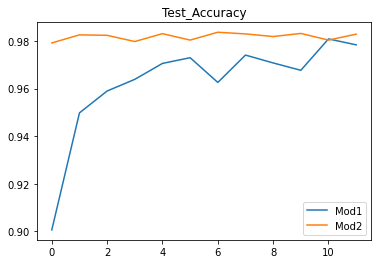

In [64]:
plt.plot("Test_Accuracy",data = mod1,label= "Mod1")
plt.plot("Test_Accuracy",data = mod2,label= "Mod2")
plt.title("Test_Accuracy")
plt.legend()
plt.show()

In [ ]:
# thus we can conclude that model 2 is performing better than model 1 so we can go ahead with model2